In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **1)** Iris dataset
---

The **Iris dataset** is a classic example for demonstrating classification algorithms. It consists of 150 samples of iris flowers belonging to three species: Setosa, Versicolor, and Virginica, with four input features (sepal and petal length/width).

Use SVC from sklearn.svm on the Iris dataset and follow the steps below:

### **a)** Load the dataset and perform train–test split (80:20).

In [ ]:
# Loading dataset
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

df = iris.frame

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# 80-20 split using STRATIFIED split
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Training records: {y_train.shape[0]}')
print(f' Testing records: {y_test.shape[0]}')

Training records: 120
 Testing records: 30


In [ ]:
y_train.value_counts()

,count
target,
0,40
2,40
1,40


In [ ]:
y_test.value_counts()

,count
target,
0,10
2,10
1,10


### **b)** Train three different SVM models using the following kernels:

Linear, Polynomial (degree=3), RBF

In [ ]:
from sklearn.svm import SVC

svm_models = list(dict())

In [ ]:
# Training linear SVM

linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)

svm_models.append({"kernel": "linear", "model": linear_svm})

In [ ]:
# Training polynomial (d=3) SVM

poly_svm = SVC(kernel='poly', degree=3)
poly_svm.fit(X_train, y_train)

svm_models.append({"kernel": "cubic polynomial", "model": poly_svm})

In [ ]:
# Training Radial (RBF) Kernel

rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)

svm_models.append({"kernel": "radial", "model": rbf_svm})

### **c)** Evaluate each model using:

- Accuracy
- Precision
- Recall
- F1-Score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for model in svm_models:
    kernel = model["kernel"]
    svm = model["model"]

    y_pred = svm.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"For SVM with {kernel} kernel:-")
    print(f"\tAccuracy: {accuracy:.4f}")
    print(f"\tPrecision: {precision:.4f}")
    print(f"\tRecall: {recall:.4f}")
    print(f"\tF1-Score: {f1:.4f}")

For SVM with linear kernel:-
	Accuracy: 1.0000
	Precision: 1.0000
	Recall: 1.0000
	F1-Score: 1.0000
For SVM with cubic polynomial kernel:-
	Accuracy: 0.9667
	Precision: 0.9697
	Recall: 0.9667
	F1-Score: 0.9666
For SVM with radial kernel:-
	Accuracy: 0.9667
	Precision: 0.9697
	Recall: 0.9667
	F1-Score: 0.9666


### **d)** Display the confusion matrix for each kernel.

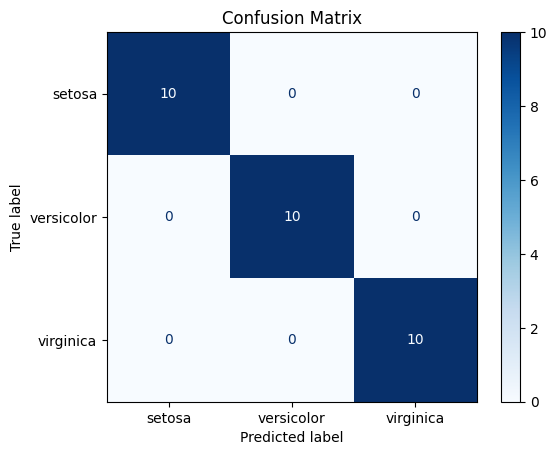

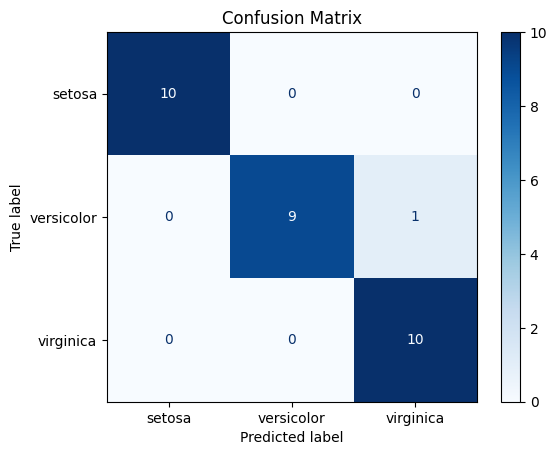

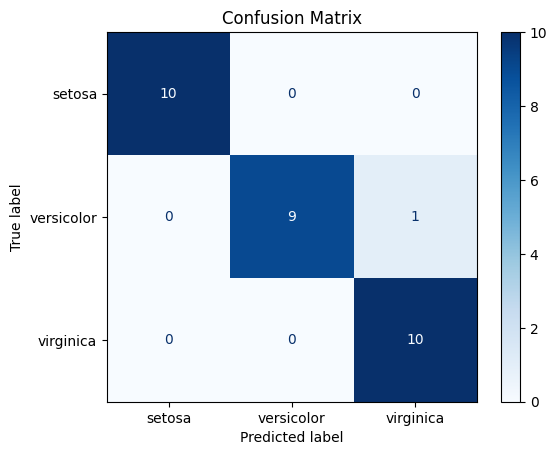

In [ ]:
# Displaying the confusion matrix using sklearn's ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for model in svm_models:
    kernel = model["kernel"]
    svm = model["model"]

    y_pred = svm.predict(X_test)

    conf_matrix = confusion_matrix(y_test, y_pred)


    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')

plt.show()

### **e)** Identify which kernel performs the best and why.

Based on the evaluation metrics, the linear kernel performed the best, achieving 100% accuracy, precision, recall, and F1-score. This suggests that the Iris dataset is linearly separable (or nearly so) through a soft margin that defines a flat affine hyperplane as a decision boundary. The confusion matrices further illustrate this, as the linear kernel shows no misclassifications, while the polynomial and radial kernels each misclassified one sample.

## **2)** Feature Scaling
---

SVM models are highly sensitive to the scale of input features. When features have different ranges, the algorithm may incorrectly assign higher importance to variables with larger magnitudes, affecting the placement of the separating hyperplane. Feature scaling ensures that all attributes contribute equally to distance-based computations, which is especially crucial for kernels like RBF or polynomial.

### A) Use the **Breast Cancer dataset** from `sklearn.datasets.load_breast_cancer`.

In [ ]:
# Loading dataset
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer(as_frame=True)

df = cancer.frame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# 80-20 train-test split
from sklearn.model_selection import train_test_split

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training records: {y_train.shape[0]}')
print(f' Testing records: {y_test.shape[0]}')

Training records: 455
 Testing records: 114


### B) Train an SVM (RBF kernel) model **with** and **without** feature scaling (`StandardScaler`). Compare both results using:

- Training accuracy
- Testing accuracy

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# Training WITHOUT feature scaling

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

SVC()

In [ ]:
# Accuracies WITHOUT feature scaling

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("WITHOUT FEATURE SCALING:-")
print(f"\tTraining Accuracy: {train_accuracy:.4f}")
print(f"\t Testing Accuracy: {test_accuracy:.4f}")

WITHOUT FEATURE SCALING:-
	Training Accuracy: 0.9143
	 Testing Accuracy: 0.9474


In [ ]:
# Scaling features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Training WITH feature scaling

scaled_svm = SVC(kernel='rbf')
scaled_svm.fit(X_train_scaled, y_train)

SVC()

In [ ]:
# Accuracies WITH feature scaling

y_train_pred = scaled_svm.predict(X_train_scaled)
y_test_pred = scaled_svm.predict(X_test_scaled)

train_scaled_accuracy = accuracy_score(y_train, y_train_pred)
test_scaled_accuracy = accuracy_score(y_test, y_test_pred)

print("WITH FEATURE SCALING:-")
print(f"\tTraining Accuracy: {train_scaled_accuracy:.4f}")
print(f"\t Testing Accuracy: {test_scaled_accuracy:.4f}")

WITH FEATURE SCALING:-
	Training Accuracy: 0.9890
	 Testing Accuracy: 0.9825


In [ ]:
# Comparing accuracies

print("WITHOUT FEATURE SCALING:-")
print(f"\tTraining Accuracy: {train_accuracy:.4f}")
print(f"\t Testing Accuracy: {test_accuracy:.4f}")

print("\nWITH FEATURE SCALING:-")
print(f"\tTraining Accuracy: {train_scaled_accuracy:.4f}")
print(f"\t Testing Accuracy: {test_scaled_accuracy:.4f}")

WITHOUT FEATURE SCALING:-
	Training Accuracy: 0.9143
	 Testing Accuracy: 0.9474

WITH FEATURE SCALING:-
	Training Accuracy: 0.9890
	 Testing Accuracy: 0.9825


Clearly, scaling the features towards a standard Gaussian distribution improved performance of the SVM in both training and testing!

### C) Discuss the effect of feature scaling on SVM performance.

SVMs, especially with RBF kernels that operate on infinite dimensional spaces, are highly sensitive to the scale and magnitude of input features because they rely on distance calculations. Without scaling, features with larger magnitudes can disproportionately dominate these calculations, leading to an inaccurate decision boundary.

When we applied `StandardScaler`, it normalized features to have a mean of 0 and a standard deviation of 1, ensuring **all features contribute equally**. This allows the RBF kernel to accurately measure similarities between data points, enabling the SVM to find a more optimal separating hyperplane and thus leading to better performance and generalization.